#Linear Regression

In [44]:
from sklearn.datasets import fetch_california_housing
#this will import the housing prices

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
df = fetch_california_housing()

In [47]:
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [48]:
dataset=pd.DataFrame(df.data)
dataset.columns=df.feature_names
#these are all independent features

In [49]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [50]:
dataset['Price']=df.target
#now to the dataset we have add our target feature that is price also

In [51]:
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [52]:
#dividing the features into dependent and independent 
X=dataset.iloc[:,:-1]##this will take all the columns except last once and these are independent features
y=dataset.iloc[:,-1]#dependent features

In [53]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

In [55]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
#standardizing the features
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.transform(X_test)

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression=LinearRegression()

mse=(cross_val_score(regression,X_train,y_train,scoring="neg_mean_squared_error",cv=5))
np.mean(mse)

np.float64(-0.5268253746355748)

In [58]:
#prediction
regression.fit(X_train,y_train)
reg_pred=regression.predict(X_test)
reg_pred

array([0.72604907, 1.76743383, 2.71092161, ..., 2.07465531, 1.57371395,
       1.82744133], shape=(6192,))

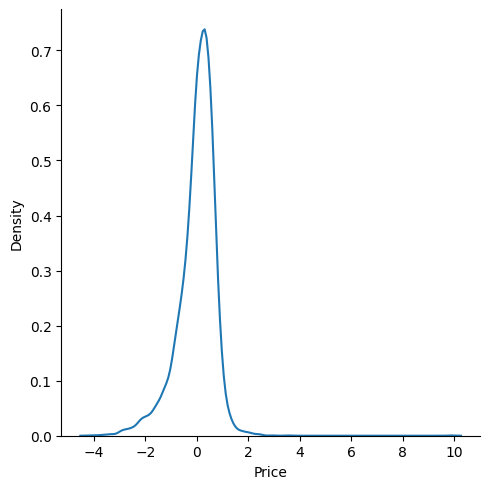

In [59]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [61]:
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
score

0.5957702326061665

In [62]:
train_score = regression.score(X_train, y_train)
test_score = regression.score(X_test, y_test)
print("Train R²:", train_score)
print("Test R²:", test_score)


Train R²: 0.609345972797216
Test R²: 0.5957702326061665


##Ridge Regression Algo

In [63]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [65]:
ridge_regressor=Ridge()

In [66]:
#here lamda is alpha here and it is set to 1 on default 
#cross validation will perform for all the aplha values and the best one will be selected
parameters={'alpha':[1,2,5,10,20,30,40,50,60]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring="neg_mean_squared_error",cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60]},
             scoring='neg_mean_squared_error')

In [67]:
print(ridgecv.best_params_)

{'alpha': 5}


In [68]:
ridge_pred=ridgecv.predict(X_test)

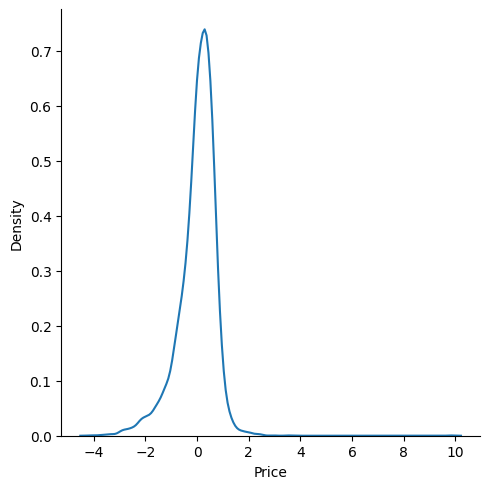

In [69]:
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [70]:
from sklearn.metrics import r2_score
score=r2_score(y_test, ridge_pred)
score

0.595859738951996

In [72]:
new_data = pd.DataFrame(
    [[8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23]],
    columns=dataset.columns[:-1]  # exclude 'Price' which is the target
)
new_data_scaled = scalar.transform(new_data)
prediction = ridgecv.predict(new_data_scaled)
print(prediction[0])



4.142588646898373
